# Dimensionality Reduction 
# Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import linear_model
from sklearn.svm import SVC

In [2]:
# Mice and Breast cancer dataset
# Golub dataset
X_golub = pd.read_csv('../data/Golub_X',sep=' ', header=None).to_numpy() # Observations
y_golub = pd.read_csv('../data/Golub_y',sep=' ', header=None).to_numpy()  # Classes
y_golub = np.squeeze(y_golub, axis=1)

# Breast Cancer dataset
data_breast_cancer = pd.read_table('../data/BreastDiagnostic.txt',sep=',',header=None)
breast_cancer_X = data_breast_cancer.iloc[:, 2:].to_numpy()
breast_cancer_y = (data_breast_cancer.iloc[:, 1].to_numpy() == 'M')*1

In [3]:
# data normalisation
scaler = StandardScaler()
X_golub = scaler.fit_transform(X_golub)
breast_cancer_X = scaler.fit_transform(breast_cancer_X)

# 1. Perform PCA to cluster the observations

In [4]:
def pca_visualisation(X, y):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1],marker='o', c=y,s=25, edgecolor='k')
    plt.show()

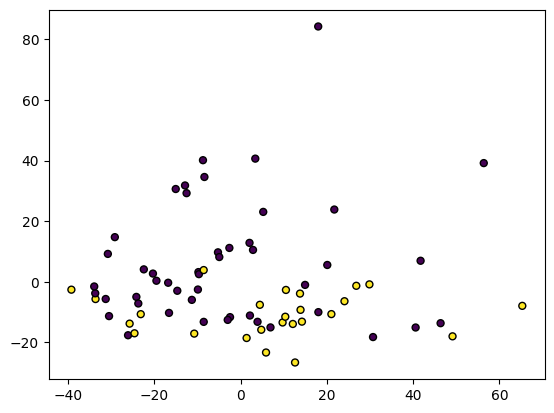

In [5]:
pca_visualisation(X_golub, y_golub)

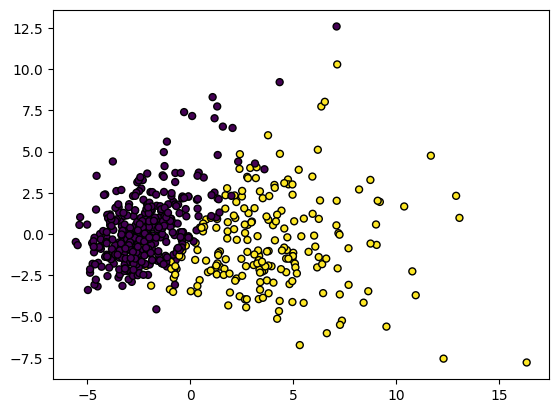

In [6]:
pca_visualisation(breast_cancer_X, breast_cancer_y)

In [7]:
def pca_visualisation_3d(X, y):
    pca = PCA(n_components=3)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], marker='o', c=y,s=25, edgecolor='k')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

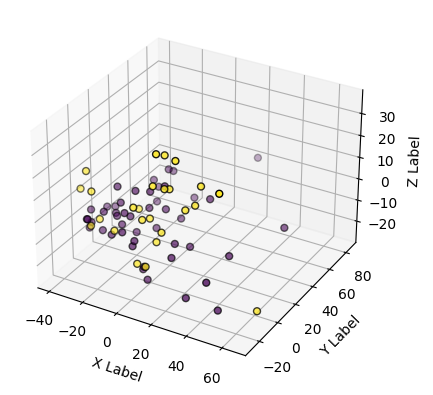

In [8]:
pca_visualisation_3d(X_golub, y_golub)

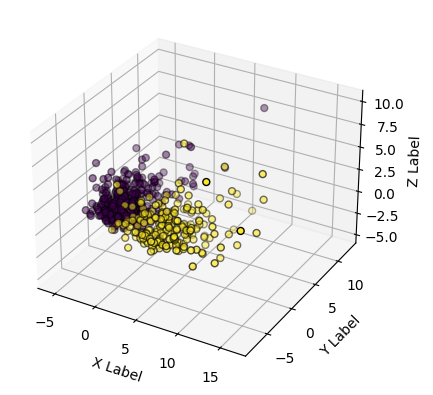

In [9]:
pca_visualisation_3d(breast_cancer_X, breast_cancer_y)

# 2. Perform and visualize the results of the kernel PCA

In [10]:
def kernel_pca_visualisation(X, y, kernel="rbf"):
    pca = KernelPCA(n_components=3, kernel=kernel, gamma=10, fit_inverse_transform=True, alpha=0.1)
    pca.fit(X)
    X_pca = pca.transform(X)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], marker='o', c=y,s=25, edgecolor='k')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

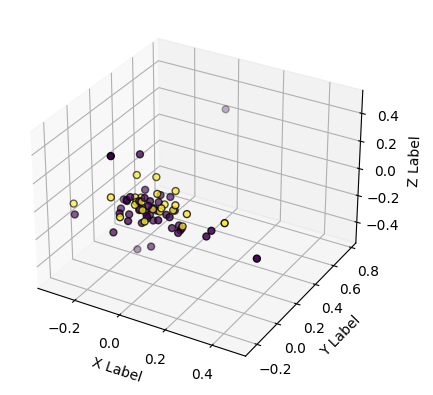

In [11]:
kernel_pca_visualisation(X_golub, y_golub, 'rbf')

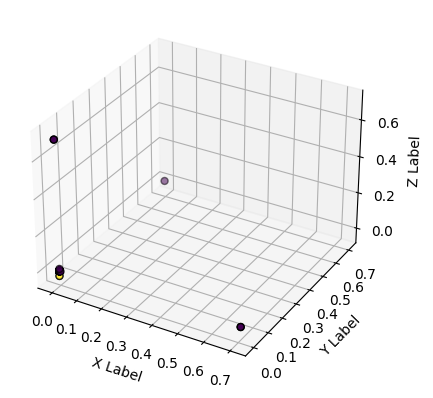

In [12]:
kernel_pca_visualisation(breast_cancer_X, breast_cancer_y, 'rbf')

With rbf kernel on breat cancer dataset, we got very strange result and I do not understand why.

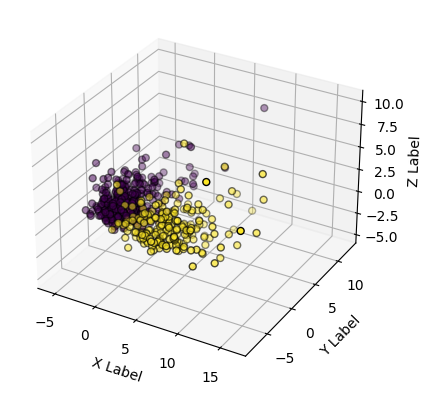

In [13]:
kernel_pca_visualisation(breast_cancer_X, breast_cancer_y, 'linear')

# 4. Incremental PCA
PCA by batch for big dataset.

In [14]:
def incremental_pca_visualisation(X, y):
    ipca = IncrementalPCA(n_components=2, batch_size=10)
    X_ipca = ipca.fit_transform(X)
    plt.scatter(X_ipca[:, 0], X_ipca[:, 1],marker='o', c=y, s=25, edgecolor='k')
    plt.show() 

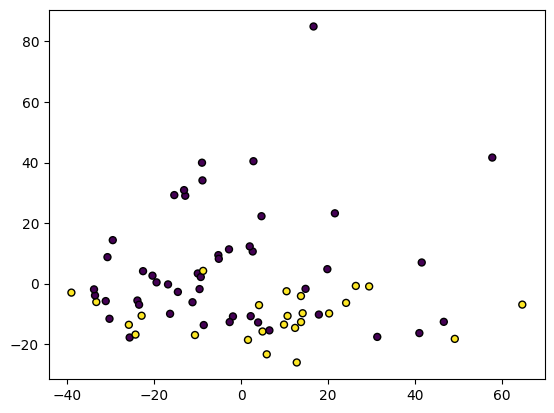

In [15]:
incremental_pca_visualisation(X_golub, y_golub)

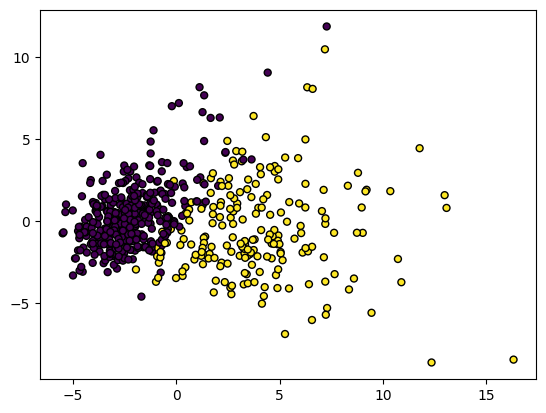

In [16]:
incremental_pca_visualisation(breast_cancer_X, breast_cancer_y)

# 4. Classification with PCA Pre-processing

In [17]:
def run_pca_classification(X, y, model, kf_split=5, dims=[2, 5, 10 ,20]):
    kf = KFold(n_splits=kf_split, shuffle=True, random_state=1)
    mean_acc = []
    for dim in dims:
        acc = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            pca = PCA(n_components=dim)
            pca.fit(X_train)
            X_train_pca = pca.transform(X_train)
            X_test_pca = pca.transform(X_test)
            model.fit(X_train_pca, y_train)
            acc.append(model.score(X_test_pca, y_test))
        mean_acc.append(np.array(acc).mean())
    print("Mean accuracy for different dims: ", mean_acc)

In [18]:
svm = SVC(random_state=42, kernel='rbf')
logreg = linear_model.LogisticRegression(max_iter=1000)

## Golub with PCA and logistic regression and SVM with rbf kernel

In [19]:
run_pca_classification(X_golub, y_golub, logreg, kf_split=5, dims=[2, 5, 10 ,20, 50])

Mean accuracy for different dims:  [0.6961904761904762, 0.9314285714285713, 0.9038095238095238, 0.9466666666666667, 0.96]


In [20]:
run_pca_classification(X_golub, y_golub, svm, kf_split=5, dims=[2, 5, 10 ,20, 50])

Mean accuracy for different dims:  [0.7104761904761905, 0.8914285714285715, 0.8771428571428572, 0.8914285714285715, 0.919047619047619]


## Breat Cancer with PCA and logistic regression and SVM with rbf kernel


In [21]:
run_pca_classification(breast_cancer_X, breast_cancer_y, logreg, kf_split=5, dims=[2, 5, 10 ,20])

Mean accuracy for different dims:  [0.9508150908244062, 0.9718987734823784, 0.9789007918025151, 0.9736221083682658]


We got better results than in last homework, without dimension reduction.

In [22]:
svm = SVC(random_state=42, kernel='rbf')
run_pca_classification(breast_cancer_X, breast_cancer_y, svm, kf_split=5, dims=[2, 5, 10 ,20])

Mean accuracy for different dims:  [0.9332712311752834, 0.9631268436578171, 0.9701288619779538, 0.9666200900481291]


# 5. Compare the LDA (Linear Discriminant Analysis) and the PCA
Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [23]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_golub_lda = lda.fit(X_golub, y_golub).transform(X_golub)

In [24]:
def incremental_pca_visualisation(X, y):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit(X, y).transform(X)
    plt.scatter(X_lda, np.zeros_like(X_lda),  marker='o', c=y, s=25, edgecolor='k')
    plt.show() 

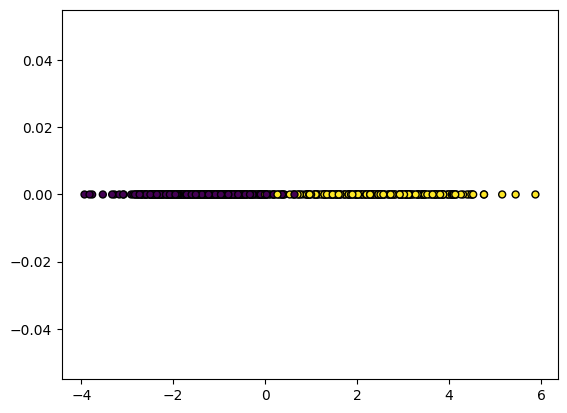

In [25]:
incremental_pca_visualisation(breast_cancer_X, breast_cancer_y)

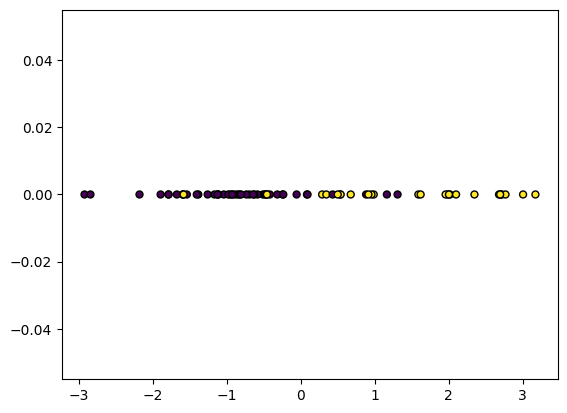

In [26]:
incremental_pca_visualisation(X_golub, y_golub)

# Which data set is “easier” for prediction, i.e., in which data sets the classes are better separated? 
I think that Breast Cancer dataset is well separated as we show before visuallement and also according to predictions maken by classifiers.

On Breast cancer dataset we achieve better results with greater accuracy.


# 7. Conclusion for dimension reduction
Was it useful to reduce the dimension of the original problems before running classification?
Are the error rates of the models learned from the reduced data smaller than ones from the
original (high-dimensional) data?

* Fewer input dimensions often mean correspondingly fewer parameters or a simpler structure in the machine learning model, referred to as degrees of freedom. A model with too many degrees of freedom is likely to overfit the training dataset and therefore may not perform well on new data.
* Dimensionality reduction yields a more compact, more easily interpretable representation of the target concept, focusing the user’s attention on the most relevant variables.
* The fundamental reason for the curse of dimensionality is that high-dimensional functions have the potential to be much more complicated than low-dimensional ones, and that those complications are harder to discern. The only way to beat the curse is to incorporate knowledge about the data that is correct.

reference: https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/

* With dimension reduction, we can also speed up training process and use less memory.
* It is a good tool for data visualisation.

## Result analysis:
We do obeserve better prediction on breast cancer and golub dataset with dimension reduction in section4